In [208]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler
warnings.filterwarnings("ignore")
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)

In [209]:
df = pd.read_csv("유방암.csv")

# 불필요한 열 제거
df = df.drop(columns=['id', 'Unnamed: 32'], errors='ignore')

df[:5]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [211]:
df.shape

(569, 31)

In [212]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [213]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [214]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [215]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [216]:
features = df.drop('diagnosis', axis=1)

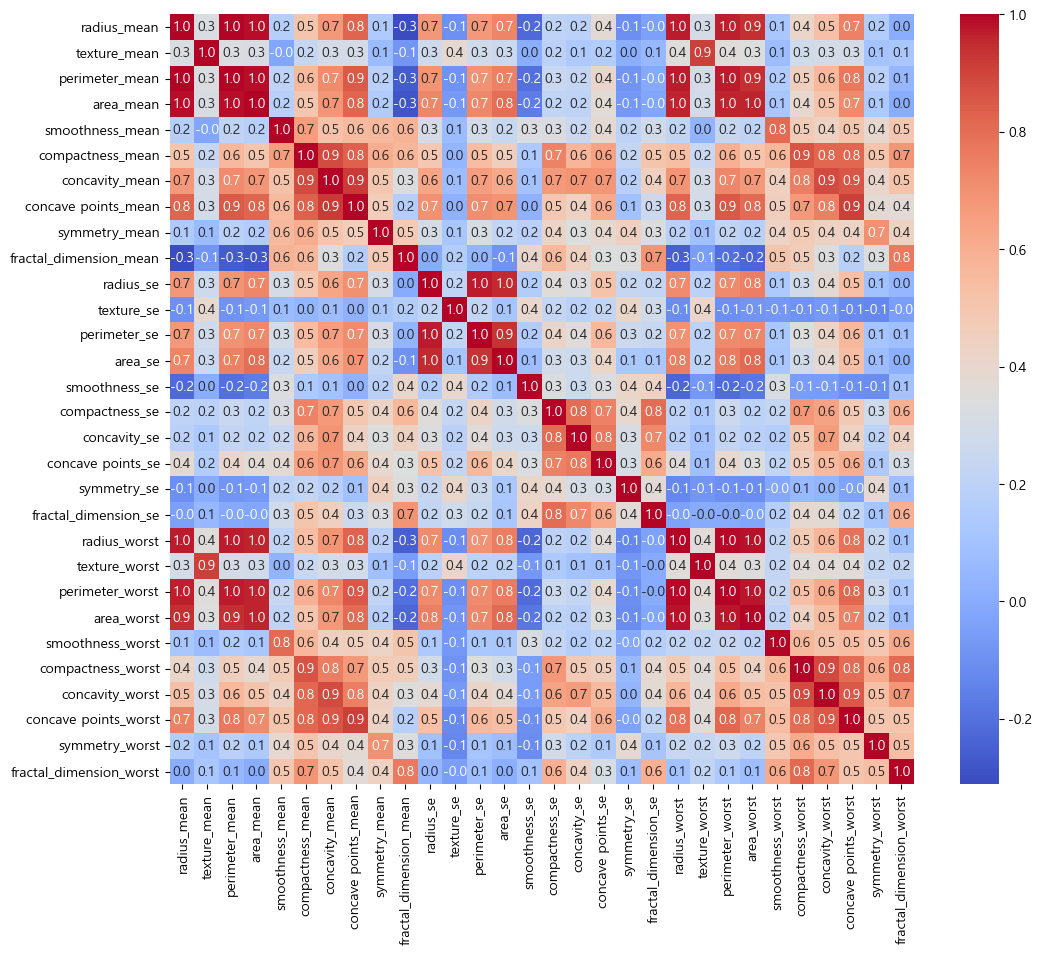

In [217]:
plt.figure(figsize=(12, 10))
sns.heatmap(features.corr(), annot=True, fmt=".1f", cmap="coolwarm")
plt.show()

In [218]:
# 강한 상관관계를 가지는 feature 추출 (예: 상관계수 > 0.8)
# 상관계수 기준으로 강한 상관관계를 갖는 쌍 찾기
high_corr_pairs = []

# 상관계수 행렬 계산
corr_matrix = df.corr(numeric_only=True)

threshold = 0.8  # 기준값
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            col1 = corr_matrix.columns[i]
            col2 = corr_matrix.columns[j]
            high_corr_pairs.append((col1, col2, corr_matrix.iloc[i, j]))

# 결과 출력
for pair in high_corr_pairs:
    print(f"{pair[0]} - {pair[1]} : 상관계수 = {pair[2]:.2f}")


radius_mean - perimeter_mean : 상관계수 = 1.00
radius_mean - area_mean : 상관계수 = 0.99
radius_mean - concave points_mean : 상관계수 = 0.82
radius_mean - radius_worst : 상관계수 = 0.97
radius_mean - perimeter_worst : 상관계수 = 0.97
radius_mean - area_worst : 상관계수 = 0.94
texture_mean - texture_worst : 상관계수 = 0.91
perimeter_mean - area_mean : 상관계수 = 0.99
perimeter_mean - concave points_mean : 상관계수 = 0.85
perimeter_mean - radius_worst : 상관계수 = 0.97
perimeter_mean - perimeter_worst : 상관계수 = 0.97
perimeter_mean - area_worst : 상관계수 = 0.94
area_mean - concave points_mean : 상관계수 = 0.82
area_mean - area_se : 상관계수 = 0.80
area_mean - radius_worst : 상관계수 = 0.96
area_mean - perimeter_worst : 상관계수 = 0.96
area_mean - area_worst : 상관계수 = 0.96
smoothness_mean - smoothness_worst : 상관계수 = 0.81
compactness_mean - concavity_mean : 상관계수 = 0.88
compactness_mean - concave points_mean : 상관계수 = 0.83
compactness_mean - compactness_worst : 상관계수 = 0.87
compactness_mean - concavity_worst : 상관계수 = 0.82
compactness_mean - concave poin

In [219]:
# 중복된 정보 제거 또는 선택
to_drop = set()

for col1, col2, corr_value in high_corr_pairs:
    # 둘 중 하나를 제거 (보통 두 feature 중 하나만 선택, 예: col2 제거)
    # 도메인 지식이나 분산, 결측치 등을 고려할 수 있음
    to_drop.add(col2)

print("제거할 feature 리스트:", to_drop)

제거할 feature 리스트: {'smoothness_worst', 'texture_worst', 'area_se', 'concavity_se', 'radius_worst', 'concavity_mean', 'perimeter_mean', 'concave points_worst', 'area_mean', 'perimeter_worst', 'fractal_dimension_worst', 'fractal_dimension_se', 'area_worst', 'perimeter_se', 'concave points_mean', 'compactness_worst', 'concavity_worst'}


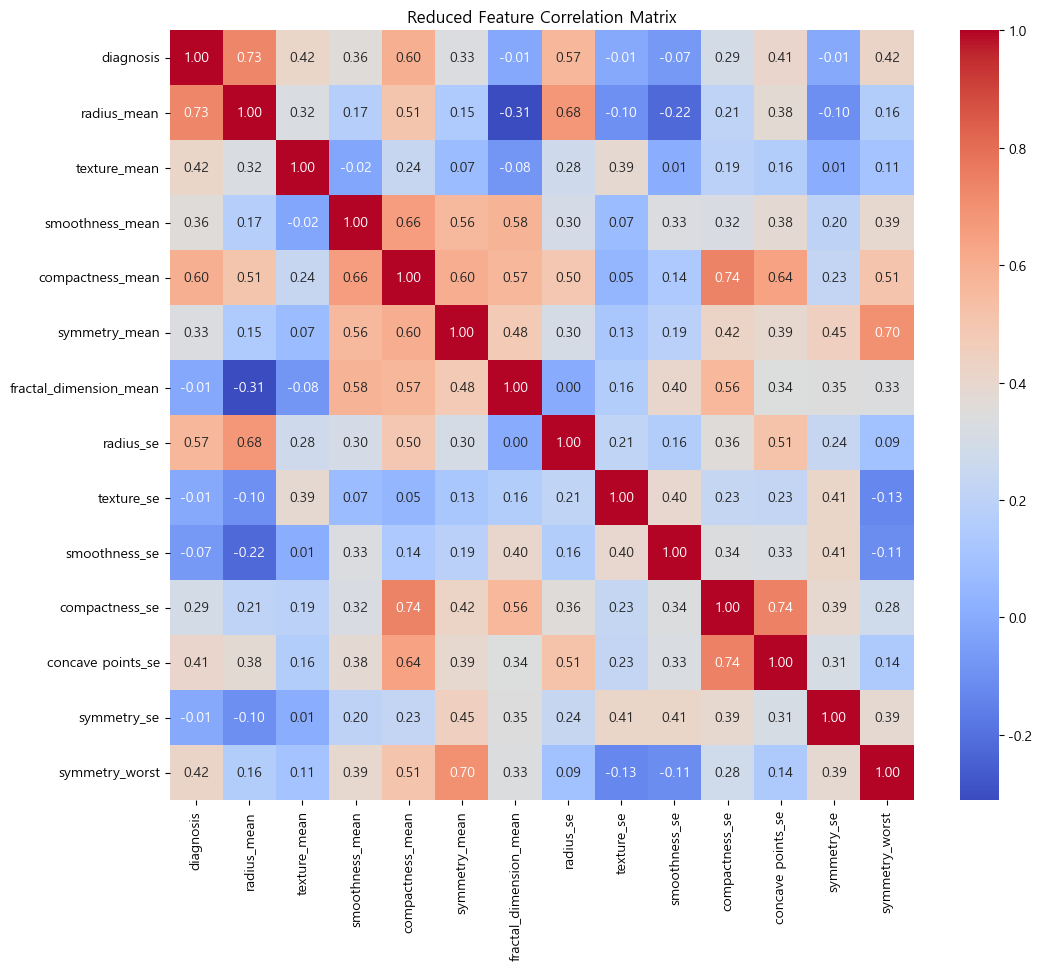

In [220]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 제거 적용
df_reduced = df.drop(columns=to_drop)

# 상관계수 행렬 계산
corr_matrix_reduced = df_reduced.select_dtypes(include='number').corr()

# 히트맵 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_reduced, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Reduced Feature Correlation Matrix")
plt.show()


In [221]:
features_col = df_reduced.drop('diagnosis', axis=1).columns
features_col = features_col.to_list()
features_col

['radius_mean',
 'texture_mean',
 'smoothness_mean',
 'compactness_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'smoothness_se',
 'compactness_se',
 'concave points_se',
 'symmetry_se',
 'symmetry_worst']

In [222]:
print(df_reduced[features_col].skew())      # 비대칭성
print(df_reduced[features_col].kurtosis())  # 뾰족함 

radius_mean               0.942380
texture_mean              0.650450
smoothness_mean           0.456324
compactness_mean          1.190123
symmetry_mean             0.725609
fractal_dimension_mean    1.304489
radius_se                 3.088612
texture_se                1.646444
smoothness_se             2.314450
compactness_se            1.902221
concave points_se         1.444678
symmetry_se               2.195133
symmetry_worst            1.433928
dtype: float64
radius_mean                0.845522
texture_mean               0.758319
smoothness_mean            0.855975
compactness_mean           1.650130
symmetry_mean              1.287933
fractal_dimension_mean     3.005892
radius_se                 17.686726
texture_se                 5.349169
smoothness_se             10.469840
compactness_se             5.106252
concave points_se          5.126302
symmetry_se                7.896130
symmetry_worst             4.444560
dtype: float64


In [223]:
# radius_se과 smoothness_se, symmetry_se는 왜도와 첨도가 너무 커서 제외
df_reduced.drop(["radius_se", "smoothness_se", "symmetry_se"], axis=1, inplace=True)
features_col.remove("radius_se")
features_col.remove("smoothness_se")
features_col.remove("symmetry_se")

In [224]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PowerTransformer
from scipy.stats.mstats import winsorize

# 1. 왜도 ≥ 1인 컬럼 → log1p 적용
skewed_vals = df_reduced[features_col].skew()
log_cols = skewed_vals[skewed_vals >= 1].index.tolist()

for col in log_cols:
    if (df_reduced[col] >= 0).all():
        df_reduced[col] = np.log1p(df_reduced[col])

# 2. 첨도 ≥ 3인 컬럼 (log1p 처리된 컬럼은 제외)
kurtosis_vals = df_reduced[features_col].kurtosis()
power_cols = list(set(kurtosis_vals[kurtosis_vals >= 3].index.tolist()))

# Winsorization
for col in power_cols:
    df_reduced[col] = pd.Series(winsorize(df_reduced[col], limits=[0.01, 0.01]), index=df_reduced.index)

# PowerTransformer 적용
if power_cols:
    pt = PowerTransformer(method='yeo-johnson')
    df_reduced[power_cols] = pt.fit_transform(df_reduced[power_cols])

In [226]:
print(df_reduced[features_col].skew())      # 비대칭성
print(df_reduced[features_col].kurtosis())  # 뾰족함

radius_mean               0.942380
texture_mean              0.650450
smoothness_mean           0.456324
compactness_mean          1.043195
symmetry_mean             0.725609
fractal_dimension_mean    1.272294
texture_se                0.629526
compactness_se            0.198896
concave points_se        -0.016013
symmetry_worst           -0.017793
dtype: float64
radius_mean               0.845522
texture_mean              0.758319
smoothness_mean           0.855975
compactness_mean          1.121206
symmetry_mean             1.287933
fractal_dimension_mean    2.858311
texture_se                0.763497
compactness_se           -0.826279
concave points_se         0.301573
symmetry_worst            0.344422
dtype: float64


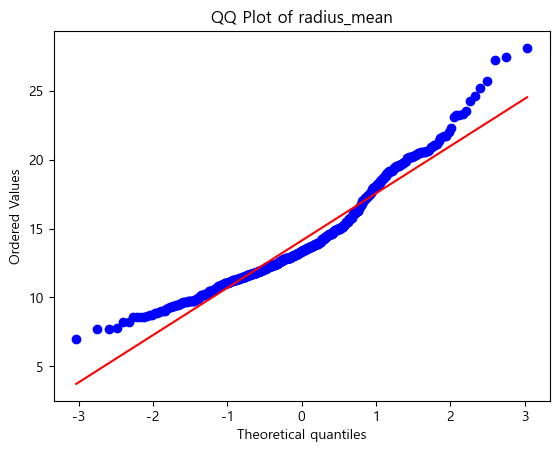

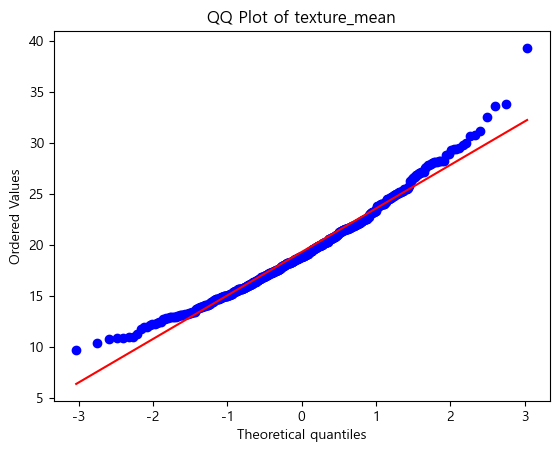

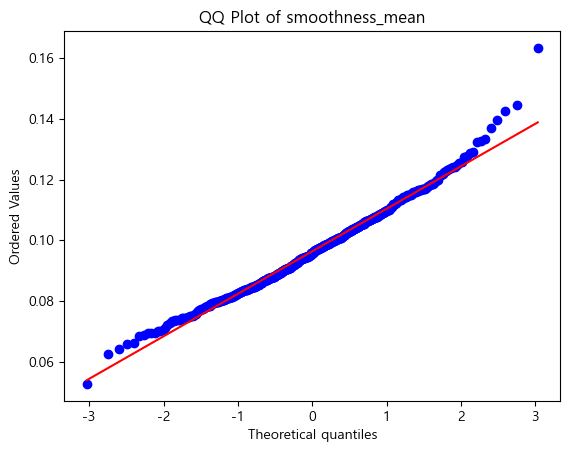

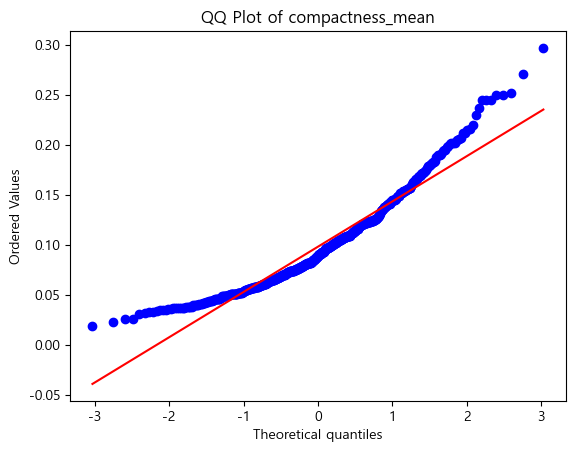

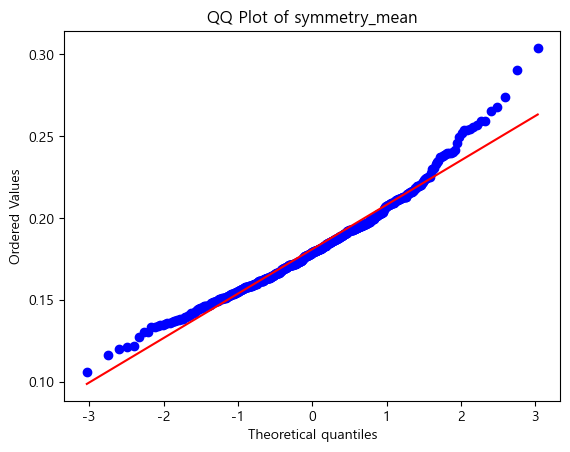

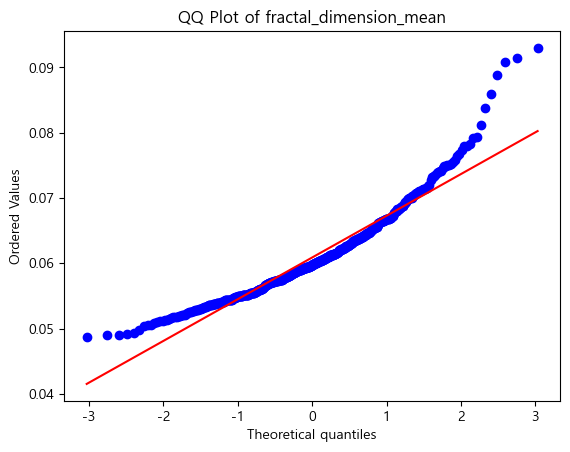

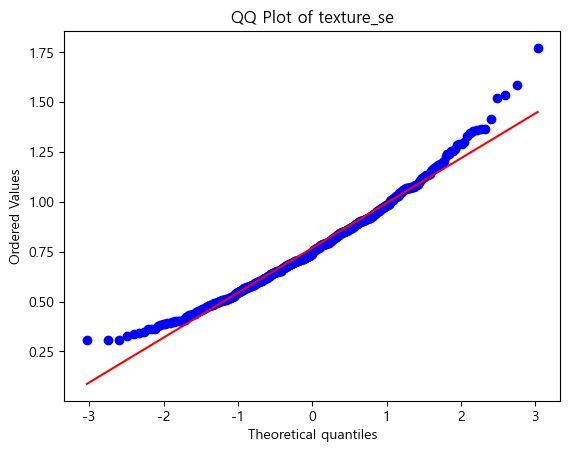

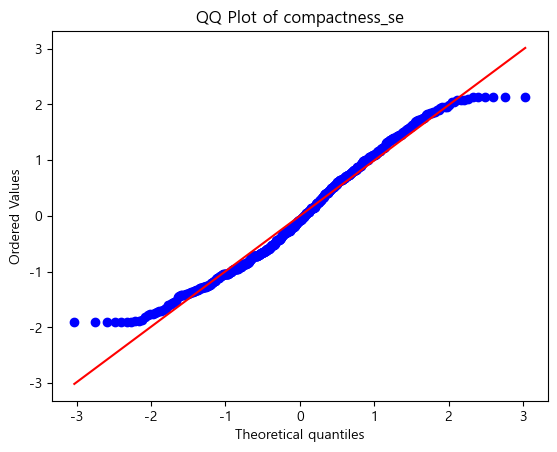

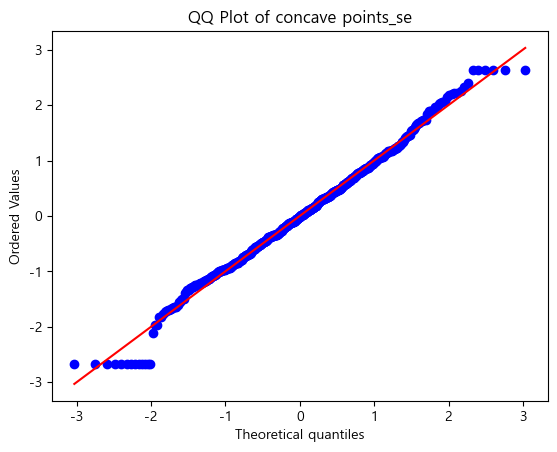

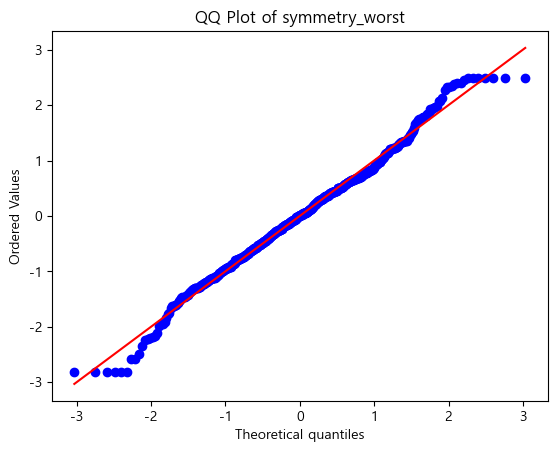

In [227]:
import scipy.stats as stats
import matplotlib.pyplot as plt

for col in features_col:
    plt.figure()
    stats.probplot(df_reduced[col], dist="norm", plot=plt)
    plt.title(f'QQ Plot of {col}')
    plt.show()

##### 첨도 3~5정도는 실무에서 사용가능하나 로지스틱이나 KNN은 왜도첨도에 예민하기 때문에 성능이 떨어지는것을 감안하여 사용함

In [145]:
# 확인용
# plt.figure(figsize=(12, 10))
# sns.heatmap(df_reduced.corr(), annot=True, fmt=".1f", cmap="coolwarm")
# plt.show()

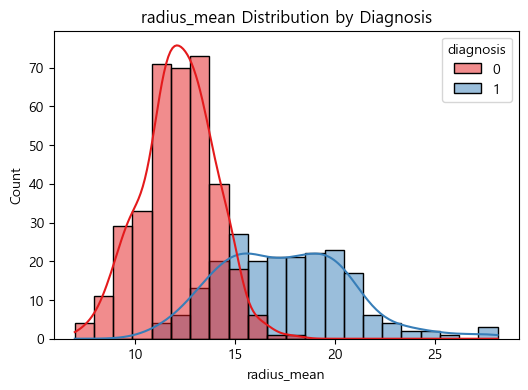

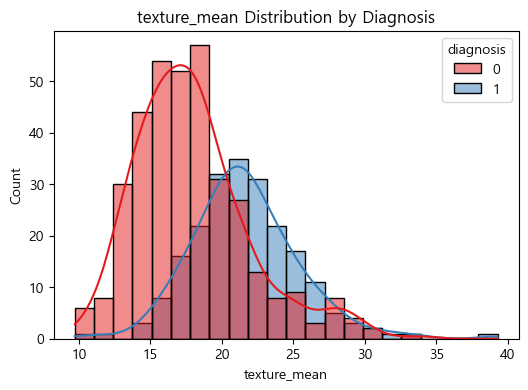

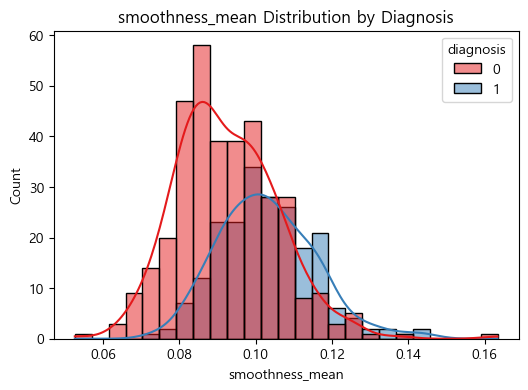

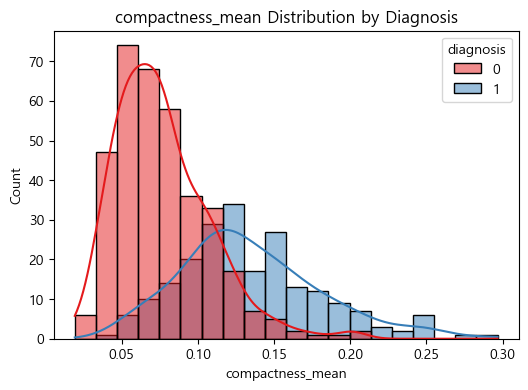

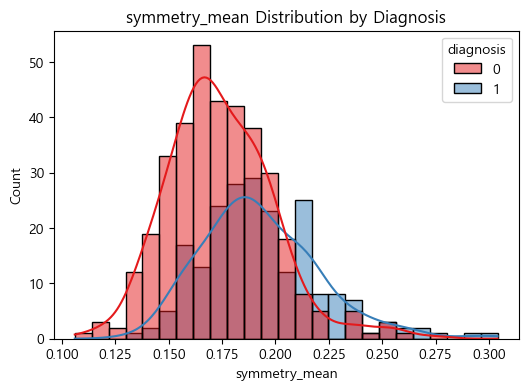

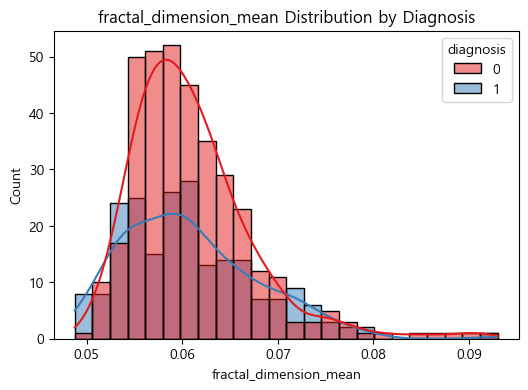

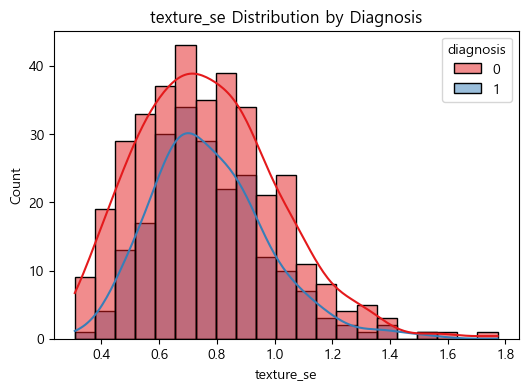

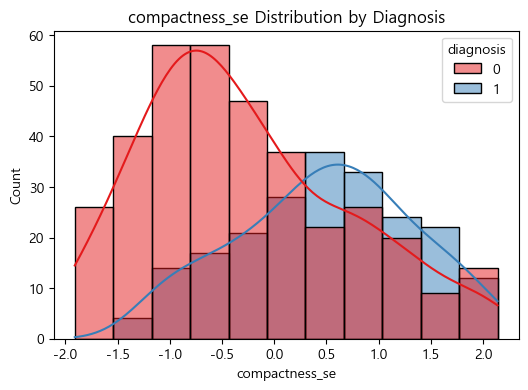

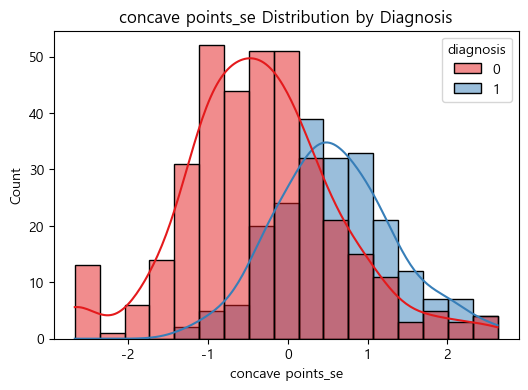

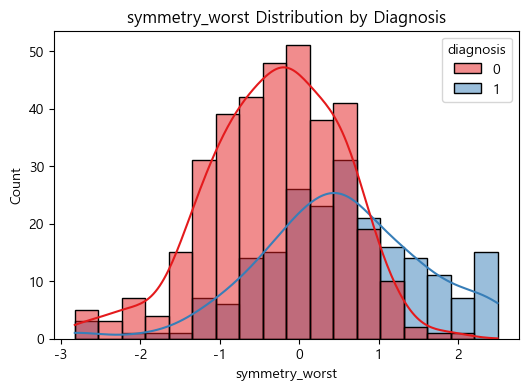

In [228]:
for feature in features_col:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df_reduced, x=feature, hue='diagnosis', kde=True, palette='Set1')
    plt.title(f'{feature} Distribution by Diagnosis')
    plt.show()

In [233]:
df_reduced.to_csv("유방암_refined.csv")

In [234]:
df = pd.read_csv("유방암_refined.csv")
df.drop('Unnamed: 0', axis=1, inplace=True)
df[:5]

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,texture_se,compactness_se,concave points_se,symmetry_worst
0,1,17.99,10.38,0.11840,0.244983,0.2419,0.075766,0.644639,1.445762,0.813429,2.275102
1,1,20.57,17.77,0.08474,0.075701,0.1812,0.055122,0.550373,-0.797281,0.421999,-0.127908
2,1,19.69,21.25,0.10960,0.148334,0.2069,0.058259,0.580482,1.124420,1.449930,1.243003
3,1,11.42,20.38,0.14250,0.249902,0.2597,0.092980,0.768255,1.960240,1.207808,2.498841
4,1,20.29,14.34,0.10030,0.124692,0.1809,0.057165,0.577343,0.258638,1.231515,-0.959691
